In [32]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [5]:
os.chdir(r"C:\Users\lenovo\Desktop\Jupyter Notebooks\Projects\MY\KMean Ciggeret Classification")

In [34]:
def get_image(path):
    im=cv2.imread(path) 
    im=cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im=cv2.resize(im,(90,135),cv2.INTER_LINEAR)
    i=im[0:100,:]
    return i

In [35]:
labels=[]
images=[]
for i in ['1','2','3','4']:
    for p in enumerate(os.listdir(os.getcwd()+'\\'+i)):
        images.append(get_image(os.getcwd()+'\\'+i+'\\'+p[1]))
        labels.append(i)

In [36]:
images

[array([[ 45,  48,  55, ...,  64,  24,  39],
        [ 46,  45,  43, ...,  72,  24,  26],
        [ 45,  45,  43, ...,  66,  25,  29],
        ...,
        [ 93,  18,  20, ...,  14,  68, 117],
        [ 90,  27,  19, ...,  12,  69, 114],
        [ 93,  24,  22, ...,  13,  71, 123]], dtype=uint8),
 array([[193, 194, 180, ..., 161, 150, 151],
        [191, 191, 180, ..., 114,  95, 108],
        [194, 192, 181, ...,  94,  97, 107],
        ...,
        [ 53,  56,  61, ...,  49,  79, 160],
        [ 58,  55,  58, ...,  43,  74, 167],
        [ 58,  58,  55, ...,  39,  75, 166]], dtype=uint8),
 array([[203, 202, 204, ..., 102,  99,  91],
        [205, 204, 195, ..., 100, 100,  89],
        [206, 202, 204, ...,  85,  93,  95],
        ...,
        [ 50,  56, 112, ...,  66,  73, 115],
        [ 52,  63, 147, ...,  75,  67, 111],
        [ 57,  67, 184, ...,  65,  68, 122]], dtype=uint8),
 array([[164, 148, 168, ..., 159, 160, 158],
        [156,  57,  85, ..., 162, 162, 158],
        [157,  5

In [37]:
x_train=np.array(images)
x_train

array([[[ 45,  48,  55, ...,  64,  24,  39],
        [ 46,  45,  43, ...,  72,  24,  26],
        [ 45,  45,  43, ...,  66,  25,  29],
        ...,
        [ 93,  18,  20, ...,  14,  68, 117],
        [ 90,  27,  19, ...,  12,  69, 114],
        [ 93,  24,  22, ...,  13,  71, 123]],

       [[193, 194, 180, ..., 161, 150, 151],
        [191, 191, 180, ..., 114,  95, 108],
        [194, 192, 181, ...,  94,  97, 107],
        ...,
        [ 53,  56,  61, ...,  49,  79, 160],
        [ 58,  55,  58, ...,  43,  74, 167],
        [ 58,  58,  55, ...,  39,  75, 166]],

       [[203, 202, 204, ..., 102,  99,  91],
        [205, 204, 195, ..., 100, 100,  89],
        [206, 202, 204, ...,  85,  93,  95],
        ...,
        [ 50,  56, 112, ...,  66,  73, 115],
        [ 52,  63, 147, ...,  75,  67, 111],
        [ 57,  67, 184, ...,  65,  68, 122]],

       ...,

       [[201, 205, 204, ..., 124, 123, 123],
        [205, 205, 204, ..., 122, 121, 124],
        [205, 205, 204, ..., 123, 120, 121

In [38]:
x_train.shape

(380, 100, 90)

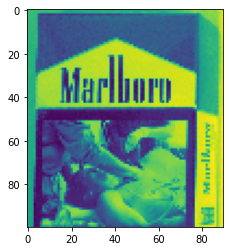

In [39]:
plt.imshow(x_train[12,:])

In [40]:
pixels=x_train.flatten().reshape(380,9000)
pixels.shape

(380, 9000)

In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [43]:
scaler=StandardScaler()
train=scaler.fit_transform(pixels)

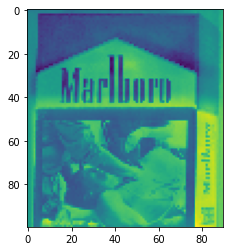

In [45]:
plt.imshow(train[12,:].reshape(100,90))

In [46]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
np.random.seed(100)
kmeans.fit(train)

KMeans(n_clusters=4, random_state=0)

In [47]:
kmeans.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,

In [48]:
data=pd.DataFrame({'cluster':kmeans.labels_,'id':range(0,380)})

In [50]:
clus_1=data[(data['cluster']==2)]
clus_1

cluster   id
105        2  105
106        2  106
108        2  108
109        2  109
110        2  110
..       ...  ...
354        2  354
360        2  360
362        2  362
372        2  372
373        2  373

[127 rows x 2 columns]

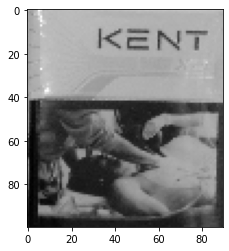

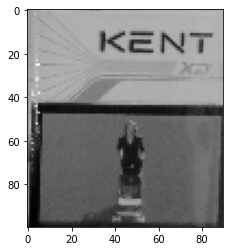

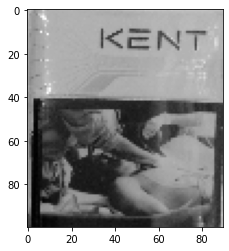

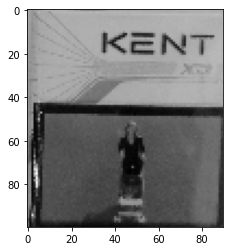

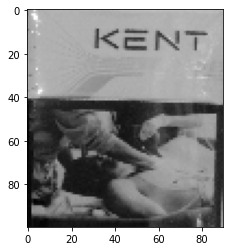

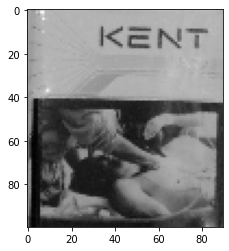

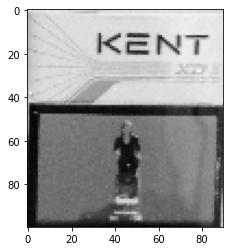

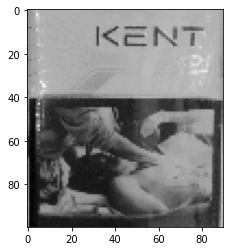

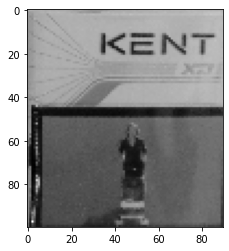

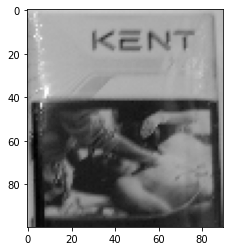

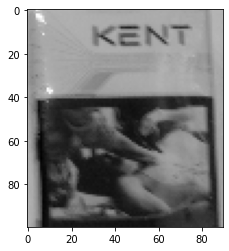

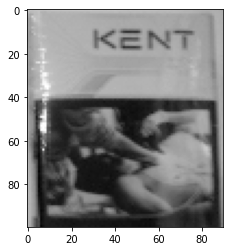

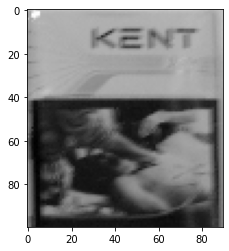

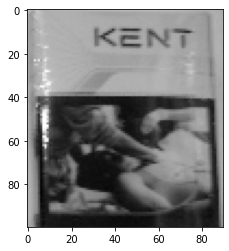

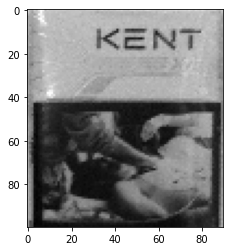

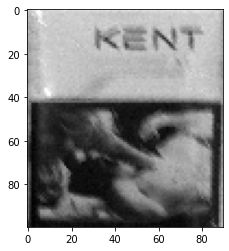

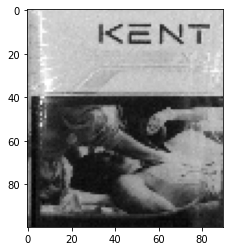

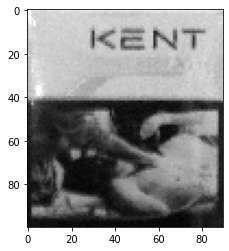

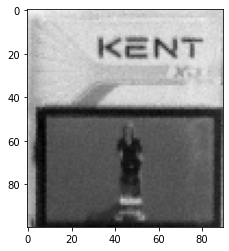

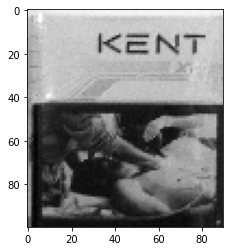

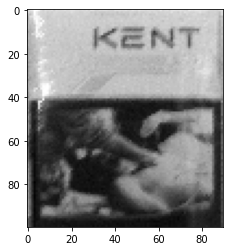

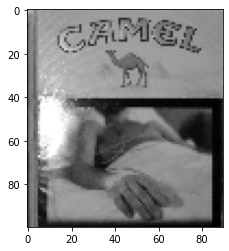

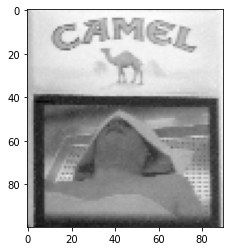

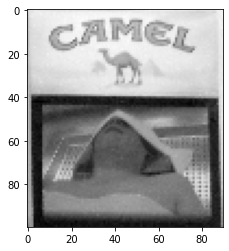

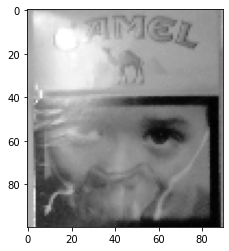

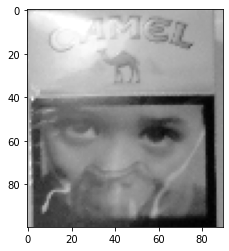

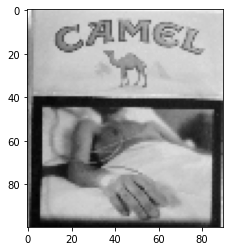

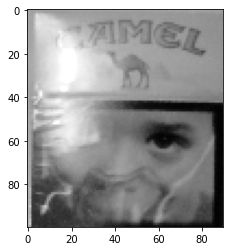

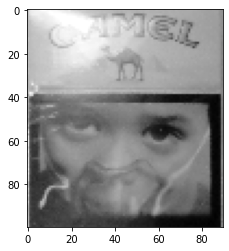

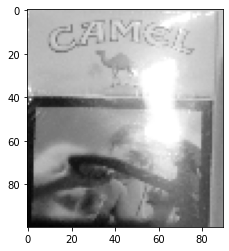

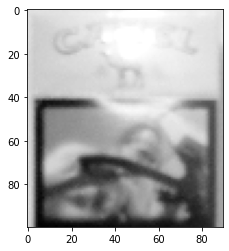

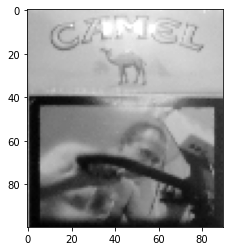

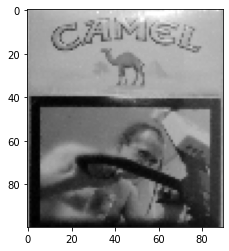

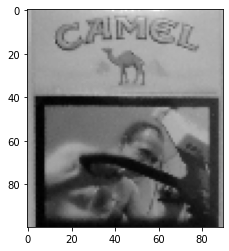

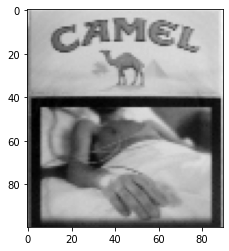

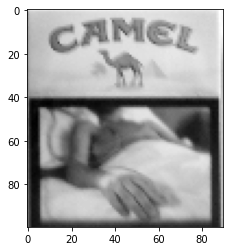

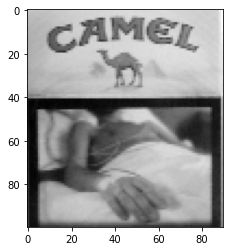

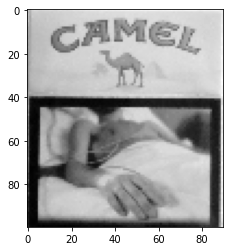

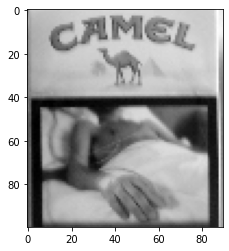

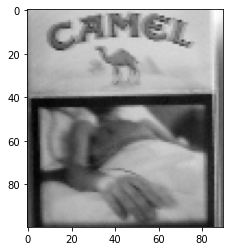

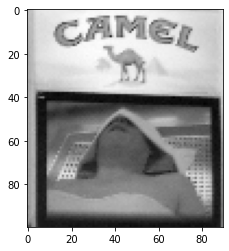

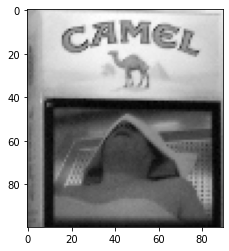

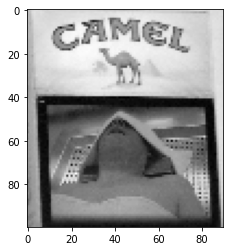

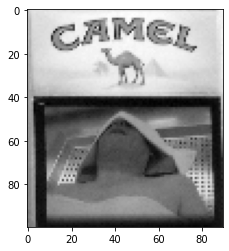

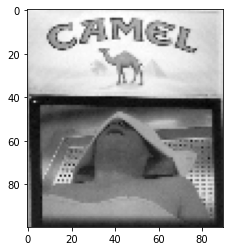

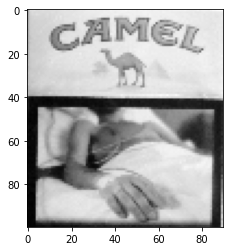

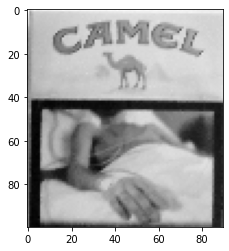

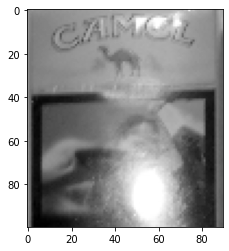

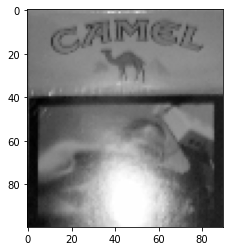

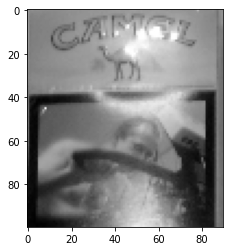

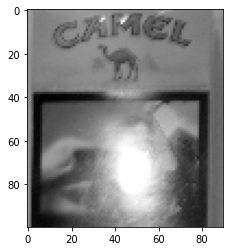

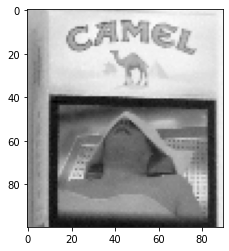

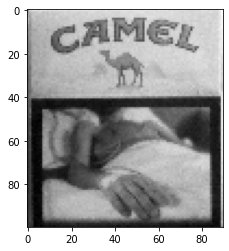

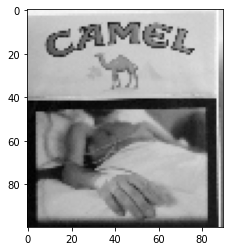

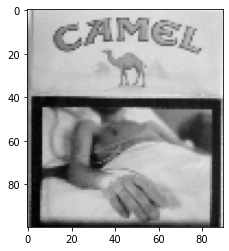

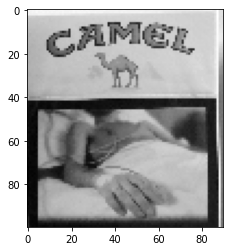

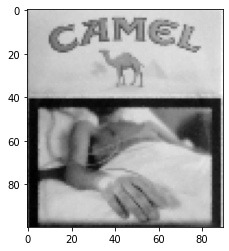

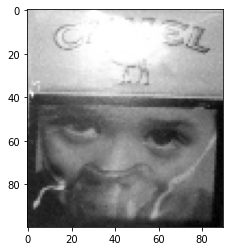

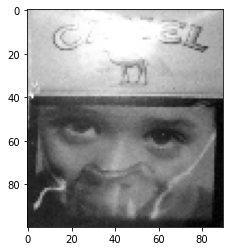

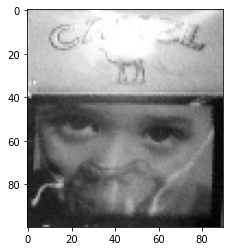

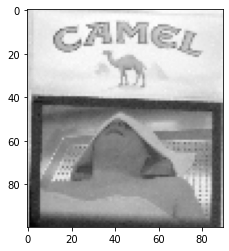

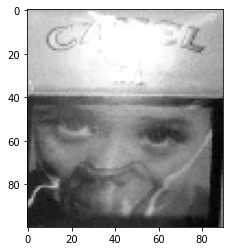

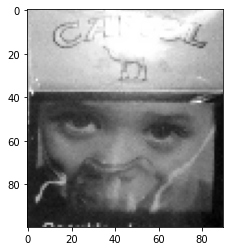

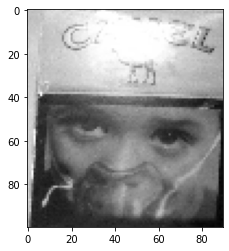

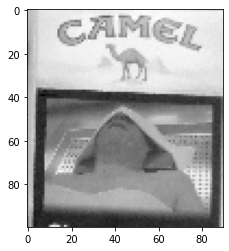

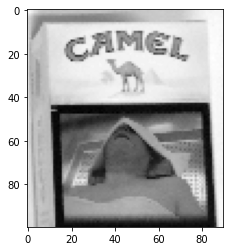

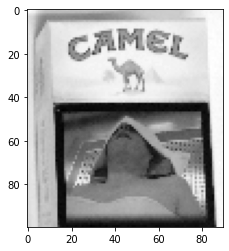

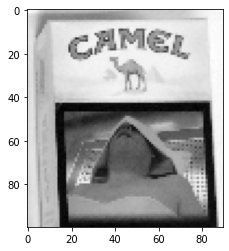

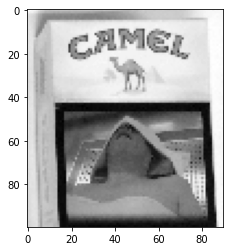

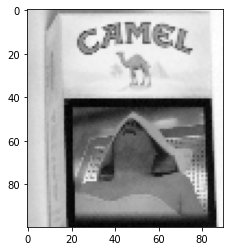

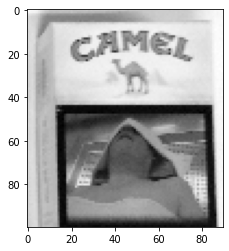

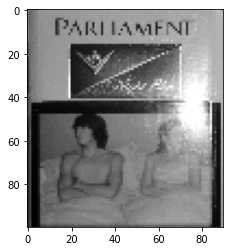

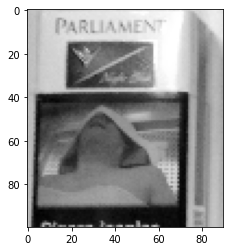

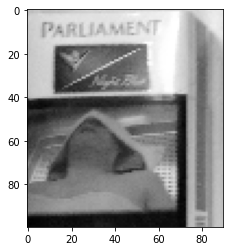

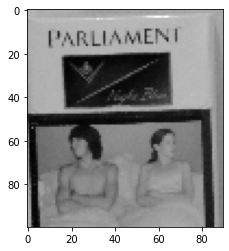

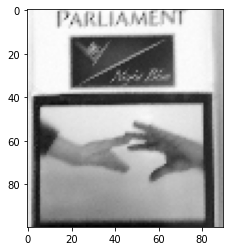

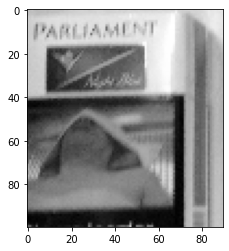

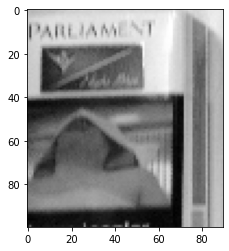

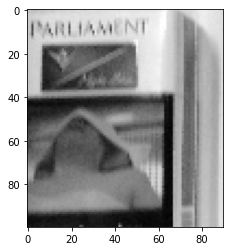

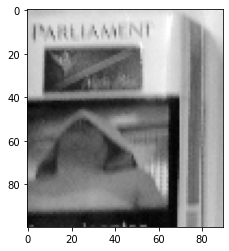

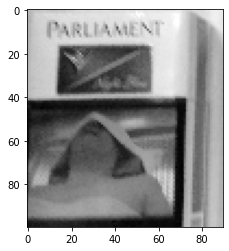

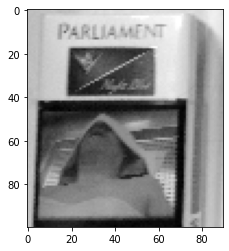

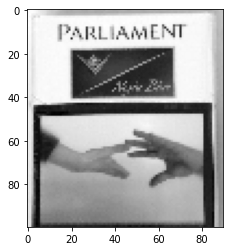

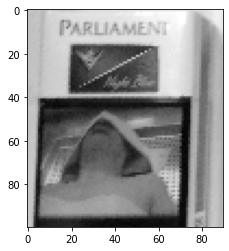

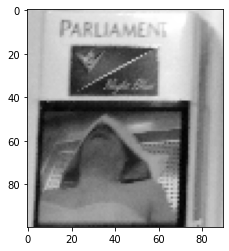

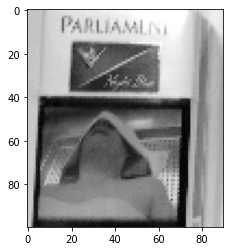

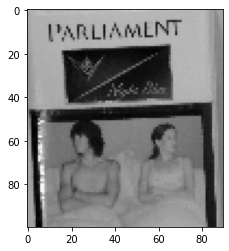

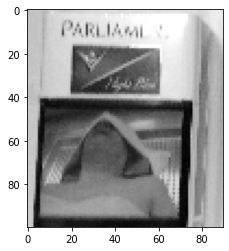

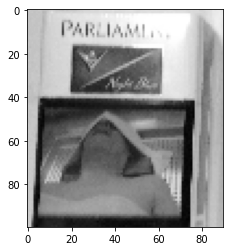

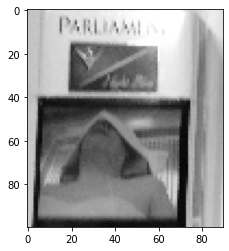

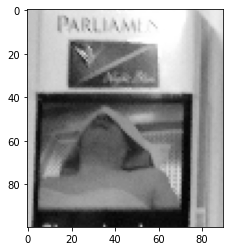

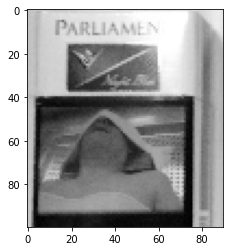

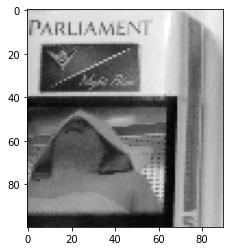

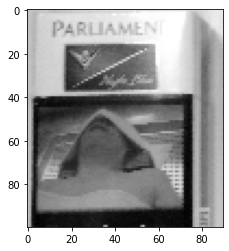

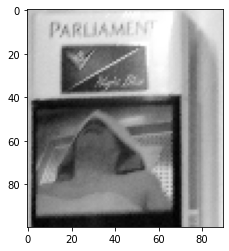

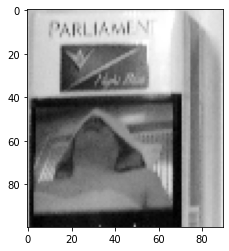

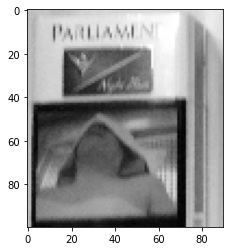

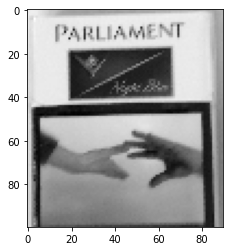

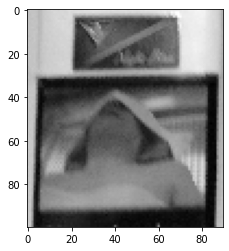

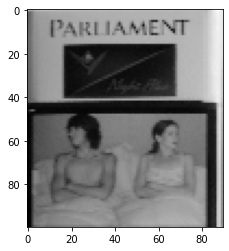

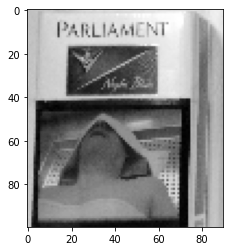

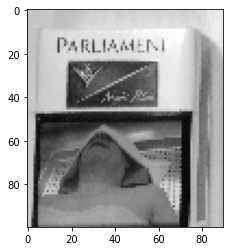

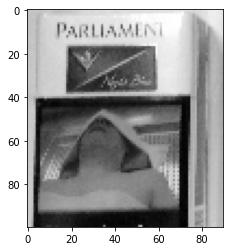

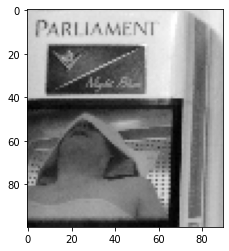

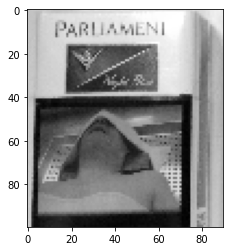

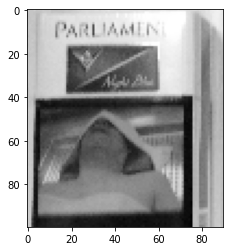

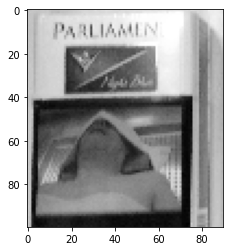

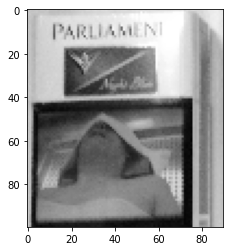

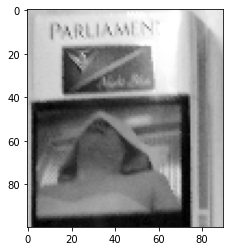

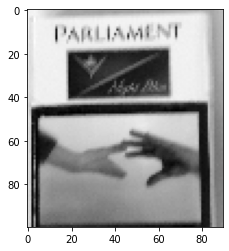

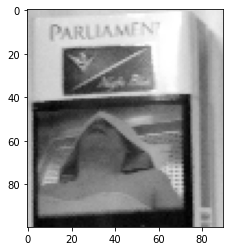

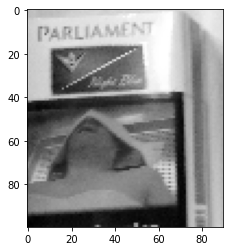

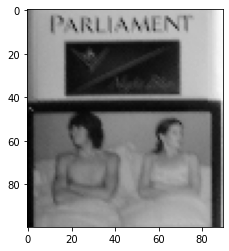

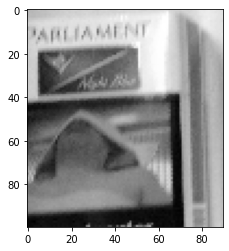

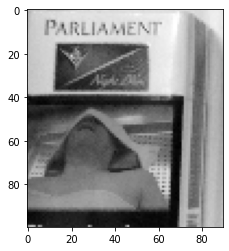

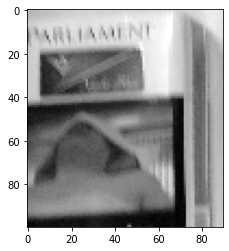

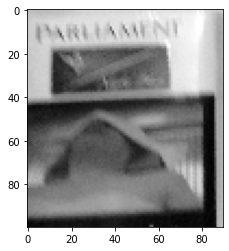

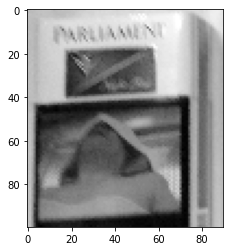

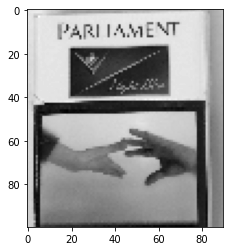

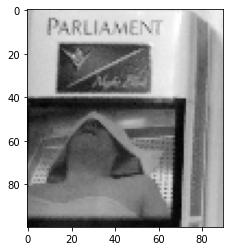

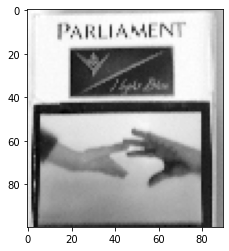

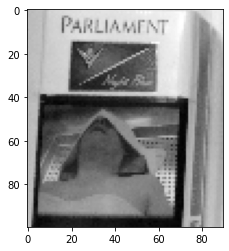

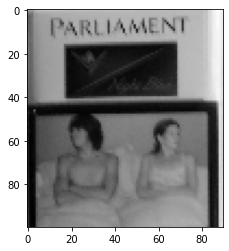

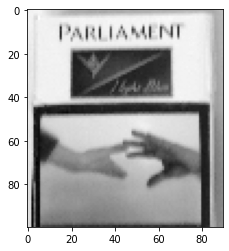

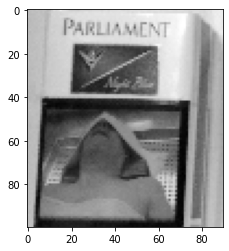

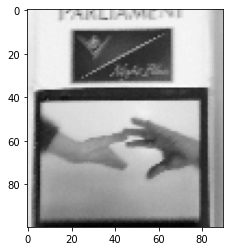

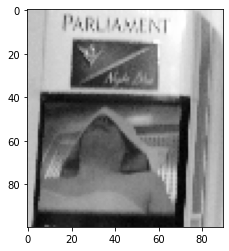

In [51]:
for i in clus_1.id:
    plt.imshow(x_train[i,:],cmap='gray')
    plt.show()